# Sentiment Analysis

## Dependencies

In [ ]:
import numpy as np
import pandas as pd

import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
nlp = spacy.load('en_core_web_sm')
# Adding pipeline
nlp.add_pipe('spacytextblob')


import neattext.functions as nfx

## Leer el Dataset

In [2]:
df = pd.read_csv('Sentiment Analysis Dataset.csv')

In [3]:
df.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...


In [4]:
df.shape

(1048575, 3)

In [5]:
df.isnull().sum()

ItemID           0
Sentiment        0
SentimentText    0
dtype: int64

## Data Cleaning

In [6]:
df['SentimentText'].head()

0                         is so sad for my APL frie...
1                       I missed the New Moon trail...
2                              omg its already 7:30 :O
3              .. Omgaga. Im sooo  im gunna CRy. I'...
4             i think mi bf is cheating on me!!!   ...
Name: SentimentText, dtype: object

In [7]:
df['text_clean'] = df['SentimentText'].apply(nfx.remove_shortwords)

In [8]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_puncts)

In [9]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_special_characters)

In [10]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_hashtags)

In [11]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_numbers)

In [12]:
df['text_clean'] = df['text_clean'].apply(nfx.remove_punctuations)

In [13]:
df[['SentimentText', 'text_clean']]

,SentimentText,text_clean
0,is so sad for my APL frie...,friend
1,I missed the New Moon trail...,missed Moon trailer
2,omg its already 7:30 :O,already
3,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...
4,i think mi bf is cheating on me!!! ...,think cheating
...,...,...
1048570,Missing my fiancee sooo badly!!! I love you b...,Missing fiancee sooo badly love baybay
1048571,missing my friend,missing friend
1048572,Missing my friend and my cousin. Two months pa...,Missing friend cousin months passed quickly
1048573,missing my friends!,missing friends


## Crear polaridad y Subjetividad  

**Métricas de polaridad y subjetividad**  
Para comenzar nuestro viaje, veamos la oferta de TextBlob. Con TextBlob, obtenemos una métrica de polaridad y subjetividad. La polaridad es el sentimiento mismo, que va de -1 a +1. La subjetividad es una medida del sentimiento siendo objetivo a subjetivo, y va de 0 a 1. Preferimos ver el sentimiento que es objetivo que subjetivo, así que una puntuación más baja probablemente denote una lectura más precisa. Ya veremos un **simple ejemplo:**

In [15]:
text= 'Missing friend cousin months passed quickly'

In [16]:
# ejemplo simple
docx = nlp(text)

In [17]:
docx._.polarity

0.06666666666666665

In [18]:
docx._.subjectivity

0.275

### Crear las Métricas de polaridad y subjetividad para el dataset

In [19]:
from textblob import TextBlob

In [20]:
df['polarity'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[0])

In [21]:
df['Subjectivity'] = df['text_clean'].apply(lambda x: TextBlob(x).sentiment[1])

In [22]:
df.head()

,ItemID,Sentiment,SentimentText,text_clean,polarity,Subjectivity
0,1,0,is so sad for my APL frie...,friend,0.0,0.0
1,2,0,I missed the New Moon trail...,missed Moon trailer,0.0,0.0
2,3,1,omg its already 7:30 :O,already,0.0,0.0
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga sooo gunna been this dentist since supo...,0.0,0.0
4,5,0,i think mi bf is cheating on me!!! ...,think cheating,0.0,0.0


In [23]:
# get sentiment
def get_sentiment(polarity):
    if polarity >0:
        sent_label = 'Positive'
    elif polarity <0:
        sent_label ='Negative'
    else:
        sent_label='Neutral'
    return sent_label

In [24]:
df['sentiment_label'] = df['polarity'].apply(lambda x: get_sentiment(x))

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

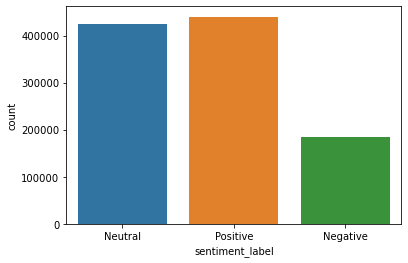

In [26]:
sns.countplot(data = df, x = 'sentiment_label')
plt.show()

In [27]:
df['sentiment_label'].value_counts()

Positive    439947
Neutral     424771
Negative    183857
Name: sentiment_label, dtype: int64

In [28]:
df['sentiment_label'].value_counts(normalize =True)*100

Positive    41.956655
Neutral     40.509358
Negative    17.533987
Name: sentiment_label, dtype: float64